# 1. Problem Statement

Identify key indicators of loans that default, so that Lending Club can use these indicators to assess prospective borrowers before granting loans.

# 2. Data Set

In [2]:
import pandas as pd

dataset = pd.read_csv('../GA_proj/final_project/lending-club-loan-data/loan.csv')
dataset.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. EDA and Feature Selection

In [3]:
dataset.shape

(887379, 74)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
#class labels
dataset.loan_status.value_counts(dropna=False)

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [6]:
# Loan statuses that do not show the end stage of the loan, i.e. Fully Paid or Default or Charged off,
# should be removed since I am unable to determine if they are good or bad loans.
# Loans with a different credit policy should also be removed
# since different policy factors may affect the outcome of a loan.
# Therefore, the only loan statuses I will use are "Fully paid", "Default", and "Charged Off".

class_filter = ['Fully Paid','Default','Charged Off']

df = dataset.loc[dataset.loan_status.isin(class_filter)]
df.shape

(254190, 74)

In [7]:
# check if filtered total rows is correct

dataset.loan_status.isin(class_filter).value_counts()

False    633189
True     254190
Name: loan_status, dtype: int64

In [8]:
# check columns for null values

df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       14010
emp_length                       9968
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           165745
purpose                             0
title                              13
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_

In [9]:
# dropping columns with more than 100k null values

df2 = df.dropna(axis=1, thresh=100000)
df2.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      14010
emp_length                      9968
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             13
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
m

In [10]:
# seems like the column 'mths_since_last_delinq' wasn't dropped for some reason. going to do it manually

df2.drop(columns='mths_since_last_delinq',inplace=True)
df2.isnull().sum()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     14010
emp_length                     9968
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            13
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [11]:
# drop all rows with null values, since remaining rows of almost 200k should be sufficient

df3 = df2.dropna(axis=0)
df3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [12]:
df3.shape

# remaining data set size

(179830, 52)

In [13]:
# describe all object columns

df3.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830
unique,2,7,35,95616,11,6,3,41,3,1,179830,13,23981,871,50,618,2,41,42,2
top,36 months,B,B4,Manager,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,Oct-2000,f,Jul-2015,Jan-2016,INDIVIDUAL
freq,136695,52792,12103,1951,61068,92344,65378,8369,146533,179830,1,111491,67472,2321,30153,1458,112031,12042,79137,179829


In [14]:
# Based on summary above, drop any columns with more than 20 unique values 
# since doing a 'get_dummies' on them would create too many extra columns

obj_summary = df3.describe(include=['object'])
col_to_remove = [obj_summary.columns[i] for i in range(len(obj_summary.columns)) if obj_summary.iloc[1,i] > 20]
col_to_remove
df4 = df3.drop(columns=col_to_remove)
df4.describe(include=['object'])

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status,application_type
count,179830,179830,179830,179830,179830,179830,179830,179830,179830,179830
unique,2,7,11,6,3,3,1,13,2,2
top,36 months,B,10+ years,MORTGAGE,Verified,Fully Paid,n,debt_consolidation,f,INDIVIDUAL
freq,136695,52792,61068,92344,65378,146533,179830,111491,112031,179829


In [15]:
# convert term and emp_length to integer data type

df4['term'] = df4['term'].str.extract('(\d+)').astype(int)
df4['emp_length'] = df4['emp_length'].str.extract('(\d+)').astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [16]:
# describe all numeric columns

df4.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.798300e+05,1.798300e+05,179830.000000,179830.000000,179830.000000,179830.000000,179830.000000,179830.000000,179830.000000,1.798300e+05,...,179830.000000,179830.000000,179830.000000,179830.000000,179830.000000,179830.0,179830.000000,1.798300e+05,1.798300e+05,1.798300e+05
mean,1.620051e+07,1.789906e+07,14314.712228,14314.702358,14307.660610,41.756770,14.248725,441.960354,6.118273,7.477460e+04,...,0.570527,168.673550,18.043120,7692.372634,0.008958,1.0,0.004104,2.021505e+02,1.399298e+05,2.974991e+04
std,1.529930e+07,1.617168e+07,8206.963357,8206.972918,8203.436448,10.248057,4.438264,246.270168,3.494055,5.999661e+04,...,4.892610,749.574059,107.476428,7730.147966,0.101826,0.0,0.069594,2.164368e+04,1.525381e+05,2.897798e+04
min,5.716700e+04,1.372250e+05,1000.000000,1000.000000,950.000000,36.000000,5.320000,27.850000,1.000000,6.000000e+03,...,0.000000,0.000000,0.000000,0.010000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+02
25%,4.806617e+06,5.799106e+06,8000.000000,8000.000000,8000.000000,36.000000,11.140000,265.680000,3.000000,4.700000e+04,...,0.000000,0.000000,0.000000,771.952500,0.000000,1.0,0.000000,0.000000e+00,2.929500e+04,1.340000e+04
50%,1.009391e+07,1.192803e+07,12000.000000,12000.000000,12000.000000,36.000000,14.090000,388.110000,6.000000,6.500000e+04,...,0.000000,0.000000,0.000000,5609.080000,0.000000,1.0,0.000000,0.000000e+00,8.338700e+04,2.240000e+04
75%,2.385425e+07,2.620847e+07,20000.000000,20000.000000,19950.000000,36.000000,17.270000,576.600000,10.000000,9.000000e+04,...,0.000000,0.000000,0.000000,11836.220000,0.000000,1.0,0.000000,0.000000e+00,2.103950e+05,3.690000e+04
max,6.860466e+07,7.350742e+07,35000.000000,35000.000000,35000.000000,60.000000,28.990000,1424.570000,10.000000,8.706582e+06,...,358.680000,33520.270000,5694.093600,36475.590000,5.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06


In [17]:
# see if there are any duplicates in unique identifier column

df4.duplicated(subset='member_id').sum()

0

In [18]:
# Look at class balance

print(df4.loan_status.value_counts())
df4.loan_status.value_counts().plot(kind='bar')

# class imbalance to be fixed later

Fully Paid     146533
Charged Off     32184
Default          1113
Name: loan_status, dtype: int64


0    146533
1     33297
Name: loan_status_encoded, dtype: int64


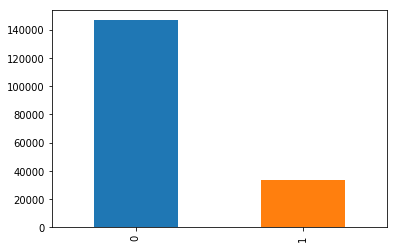

In [19]:
# Encode class labels so that relationships with columns can be examined

import numpy as np

df4['loan_status_encoded'] = np.where(df4['loan_status']=='Fully Paid',0,1)

print(df4.loan_status_encoded.value_counts())
df4.loan_status_encoded.value_counts().plot(kind='bar')

loan_status_encoded           1.000000
total_rec_prncp               0.493620
recoveries                    0.472062
last_pymnt_amnt               0.444249
total_pymnt                   0.393114
total_pymnt_inv               0.393088
collection_recovery_fee       0.352180
int_rate                      0.242349
total_rec_late_fee            0.159365
term                          0.146052
out_prncp                     0.139473
out_prncp_inv                 0.139472
dti                           0.123102
revol_util                    0.094220
tot_cur_bal                   0.074114
total_rec_int                 0.064566
id                            0.064197
annual_inc                    0.063238
member_id                     0.063155
total_rev_hi_lim              0.053982
funded_amnt_inv               0.053269
funded_amnt                   0.053213
loan_amnt                     0.053212
inq_last_6mths                0.051722
installment                   0.041180
total_acc                

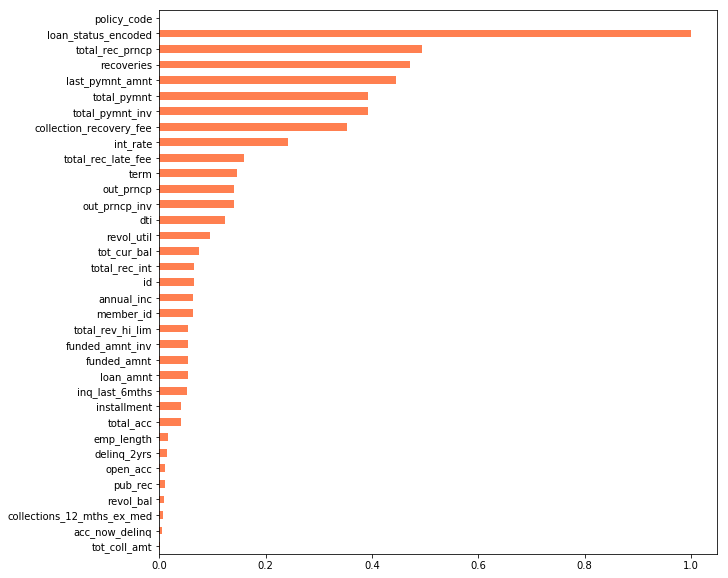

In [20]:
# compare correlation of numerical columns with class labels for feature selection
# using high correlation as qualifying factor

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

print(df4.corr().loc['loan_status_encoded'].abs().sort_values(ascending=False))
df4.corr().loan_status_encoded.abs().sort_values().plot(kind='barh', figsize=(10,10), color='coral')

In [21]:
# seems like most columns have low correlation with class labels.
# using information above, pick feature columns using the following conditions -
# condition 1: absolute correlation value of higher than 0.1
# condition 2: data point must be available before loan is granted

num_features = ['int_rate', 'term', 'dti']    #dti is debt to income ratio

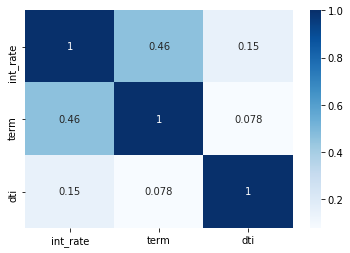

In [22]:
# check that these features are not highly correlated with one another

sns.heatmap(df4[num_features].corr(), annot=True, cmap='Blues')

In [23]:
# for categorical columns, study the data dictionary to find suitable columns

cat_features = ['grade', 'verification_status']

In [24]:
# final dataset to be used for models

df5 = pd.concat([df4['loan_status_encoded'],df4[num_features],df4[cat_features]],axis=1)
print(df5.shape)
df5.head()


(179830, 6)


,loan_status_encoded,int_rate,term,dti,grade,verification_status
42538,0,13.53,36,16.94,B,Source Verified
42544,0,12.85,36,24.68,B,Verified
42546,0,7.62,36,18.55,A,Source Verified
42549,0,13.53,36,22.18,B,Verified
42552,0,14.47,36,6.15,C,Not Verified


In [25]:
# quick look at the percentage of each grade which defaults

def percConvert(ser):
  return ser/float(ser[-1])

pd.crosstab(df5.grade,df5.loan_status_encoded, margins=True).apply(percConvert, axis=1)

# can conclude that there is correlation with default since default % increases as grade decreases

loan_status_encoded,0,1,All
grade,,,
A,0.942690,0.057310,1.0
B,0.879622,0.120378,1.0
C,0.805172,0.194828,1.0
D,0.736286,0.263714,1.0
E,0.669413,0.330587,1.0
F,0.615833,0.384167,1.0
G,0.584815,0.415185,1.0
All,0.814842,0.185158,1.0


In [26]:
# quick look at the percentage of verification status which defaults

pd.crosstab(df5.verification_status,df5.loan_status_encoded, margins=True).apply(percConvert, axis=1)

# seems to have correlations as well, with verified incomes showing a higher default rate.

loan_status_encoded,0,1,All
verification_status,,,
Not Verified,0.851846,0.148154,1.0
Source Verified,0.804069,0.195931,1.0
Verified,0.790358,0.209642,1.0
All,0.814842,0.185158,1.0


In [27]:
# get dummies for categorical columns so that they can be used in sklearn

grade_dummies = pd.get_dummies(df5.grade, drop_first=True)
grade_dummies.head()

,B,C,D,E,F,G
42538,1,0,0,0,0,0
42544,1,0,0,0,0,0
42546,0,0,0,0,0,0
42549,1,0,0,0,0,0
42552,0,1,0,0,0,0


In [28]:
verification_dummies = pd.get_dummies(df5.verification_status, drop_first=True)
verification_dummies.head()

,Source Verified,Verified
42538,1,0
42544,0,1
42546,1,0
42549,0,1
42552,0,0


In [29]:
# concat dummies to dataframe and remove original columns

df6 = pd.concat([df5, grade_dummies, verification_dummies],axis=1)
df6.drop(columns=['grade','verification_status'],inplace=True)

In [30]:
print(df6.shape)
df6.head()

(179830, 12)


,loan_status_encoded,int_rate,term,dti,B,C,D,E,F,G,Source Verified,Verified
42538,0,13.53,36,16.94,1,0,0,0,0,0,1,0
42544,0,12.85,36,24.68,1,0,0,0,0,0,0,1
42546,0,7.62,36,18.55,0,0,0,0,0,0,1,0
42549,0,13.53,36,22.18,1,0,0,0,0,0,0,1
42552,0,14.47,36,6.15,0,1,0,0,0,0,0,0


# 4. Class Imbalance

- class imbalance is present in data set. 
- Apply smote + tomek

In [31]:
X = df6.drop(columns='loan_status_encoded')
X.head()

,int_rate,term,dti,B,C,D,E,F,G,Source Verified,Verified
42538,13.53,36,16.94,1,0,0,0,0,0,1,0
42544,12.85,36,24.68,1,0,0,0,0,0,0,1
42546,7.62,36,18.55,0,0,0,0,0,0,1,0
42549,13.53,36,22.18,1,0,0,0,0,0,0,1
42552,14.47,36,6.15,0,1,0,0,0,0,0,0


In [32]:
y = df6.loan_status_encoded
y.head()

42538    0
42544    0
42546    0
42549    0
42552    0
Name: loan_status_encoded, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=1213)

In [34]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=1213)

X_res, y_res = sm.fit_sample(X1,y1)

In [35]:
from collections import Counter

# compare class balance before and after SMOTETomek

print('------ Before SMOTETomek ------')
print(sorted(Counter(y1).items()))
print()
print('------ After SMOTETomek ------')
print(sorted(Counter(y_res).items()))

------ Before SMOTETomek ------
[(0, 102582), (1, 23299)]

------ After SMOTETomek ------
[(0, 90347), (1, 90347)]


# 5. Models and Results

In [36]:
# baseline accuracy

1. - (df6.loan_status_encoded.sum()/len(df6.loan_status_encoded))

0.8148417950286382

Accuracy Score is : 0.6575476396908262

Confusion Matrix:
[[17226  9887]
 [ 8677 18419]]

Classification Report:
             precision    recall  f1-score   support

          0       0.67      0.64      0.65     27113
          1       0.65      0.68      0.66     27096

avg / total       0.66      0.66      0.66     54209



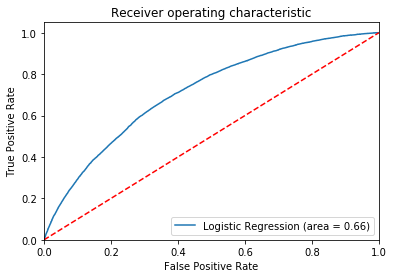

In [37]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1213)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Print accuracy score
print("Accuracy Score is : {}".format(metrics.accuracy_score(y_test, y_pred)))
print()

# Print Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)
print()

# Print Classification Report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# plot AUC
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
# check for overfitting

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=1213)
modelCV = LogisticRegression()
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.659


------------------------------------

Max Depth: 5

Accuracy Score is : 0.6701101293143205

Confusion Matrix:
[[18428  8685]
 [ 9198 17898]]

Classification Report:
             precision    recall  f1-score   support

          0       0.67      0.68      0.67     27113
          1       0.67      0.66      0.67     27096

avg / total       0.67      0.67      0.67     54209



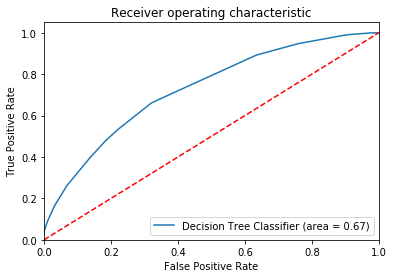

------------------------------------

Max Depth: 10

Accuracy Score is : 0.6977623641830693

Confusion Matrix:
[[20090  7023]
 [ 9361 17735]]

Classification Report:
             precision    recall  f1-score   support

          0       0.68      0.74      0.71     27113
          1       0.72      0.65      0.68     27096

avg / total       0.70      0.70      0.70     54209



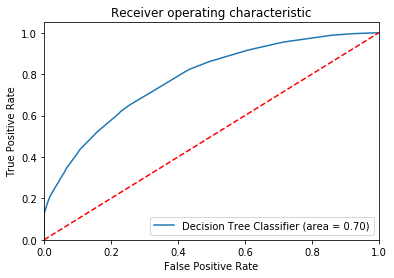

------------------------------------

Max Depth: 25

Accuracy Score is : 0.7943145972071058

Confusion Matrix:
[[21796  5317]
 [ 5833 21263]]

Classification Report:
             precision    recall  f1-score   support

          0       0.79      0.80      0.80     27113
          1       0.80      0.78      0.79     27096

avg / total       0.79      0.79      0.79     54209



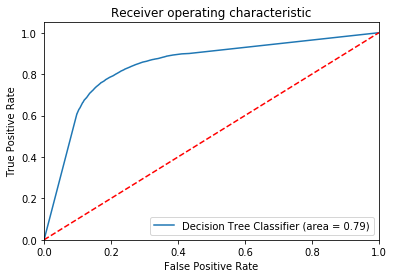

------------------------------------

Max Depth: 50

Accuracy Score is : 0.8223542216237156

Confusion Matrix:
[[22368  4745]
 [ 4885 22211]]

Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.82      0.82     27113
          1       0.82      0.82      0.82     27096

avg / total       0.82      0.82      0.82     54209



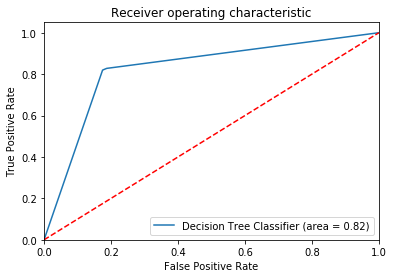

------------------------------------

Max Depth: 75

Accuracy Score is : 0.8225202457156561

Confusion Matrix:
[[22371  4742]
 [ 4879 22217]]

Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.83      0.82     27113
          1       0.82      0.82      0.82     27096

avg / total       0.82      0.82      0.82     54209



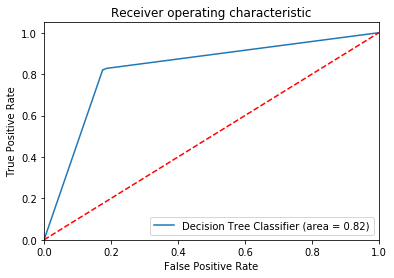

------------------------------------

Max Depth: 100

Accuracy Score is : 0.8225202457156561

Confusion Matrix:
[[22371  4742]
 [ 4879 22217]]

Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.83      0.82     27113
          1       0.82      0.82      0.82     27096

avg / total       0.82      0.82      0.82     54209



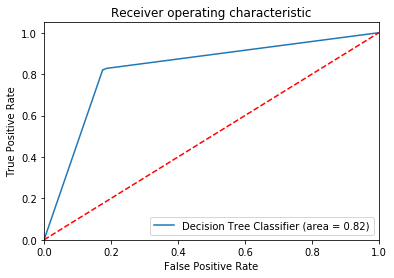

------------------------------------

Max Depth: 200

Accuracy Score is : 0.8225202457156561

Confusion Matrix:
[[22371  4742]
 [ 4879 22217]]

Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.83      0.82     27113
          1       0.82      0.82      0.82     27096

avg / total       0.82      0.82      0.82     54209



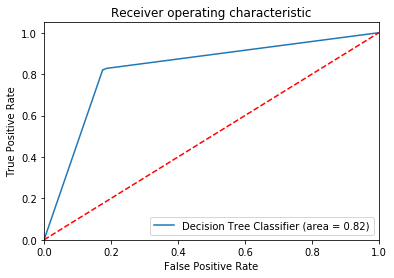

In [39]:
# Use Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1213)

#try different number of max_depths

depths = [5,10,25,50,75,100,200]

for depth in depths:

    print('------------------------------------\n')
    print('Max Depth: {}'.format(depth))
    print()
    
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1213)
    treeclf.fit(X_train, y_train)

    y_pred = treeclf.predict(X_test)

    # Print accuracy score
    print("Accuracy Score is : {}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

    # Print Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_matrix)
    print()

    # Print Classification Report
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    
    # plot AUC
    treeclf_roc_auc = metrics.roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, treeclf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % treeclf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [40]:
# check for overfitting

kfold = KFold(n_splits=5, random_state=1213)
modelCV = DecisionTreeClassifier(max_depth=50, random_state=1213)
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.811


------------------------------------

Max Depth: 50

Accuracy Score is : 0.7225342453057517

Confusion Matrix:
[[36512  7439]
 [ 7530  2468]]

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.83      0.83     43951
          1       0.25      0.25      0.25      9998

avg / total       0.72      0.72      0.72     53949



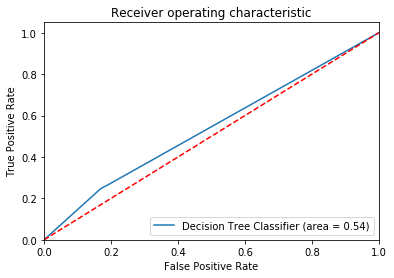

In [126]:
# Results without SMOTETomek using decision tree classifier with max depth 50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1213)

depths = [50]

for depth in depths:

    print('------------------------------------\n')
    print('Max Depth: {}'.format(depth))
    print()
    
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1213)
    treeclf.fit(X_train, y_train)

    y_pred = treeclf.predict(X_test)

    # Print accuracy score
    print("Accuracy Score is : {}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

    # Print Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_matrix)
    print()

    # Print Classification Report
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    
    # plot AUC
    treeclf_roc_auc = metrics.roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, treeclf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % treeclf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [41]:
# Results using holdout set using decision tree classifier with max depth 50

depths = [50]

for depth in depths:

    print('------------------------------------\n')
    print('Max Depth: {}'.format(depth))
    print()
    
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1213)
    treeclf.fit(X_res, y_train)

    y_pred = treeclf.predict(X2)

    # Print accuracy score
    print("Accuracy Score is : {}".format(metrics.accuracy_score(y2, y_pred)))
    print()

    # Print Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y2, y_pred)
    print("Confusion Matrix:")
    print(confusion_matrix)
    print()

    # Print Classification Report
    print("Classification Report:")
    print(metrics.classification_report(y2, y_pred))
    
    # plot AUC
    treeclf_roc_auc = metrics.roc_auc_score(y2, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y2, treeclf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % treeclf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

------------------------------------

Max Depth: 50

Accuracy Score is : 0.6885577119131031

Confusion Matrix:
[[33907 10044]
 [ 6758  3240]]

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.77      0.80     43951
          1       0.24      0.32      0.28      9998

avg / total       0.72      0.69      0.70     53949



ValueError: Found input variables with inconsistent numbers of samples: [53949, 54209]

# 7. Conclusion